<pre style='font-size :25px; text-align: center'><b>ASSIGNMENT 1</b></pre>
<pre style='font-size :20px'><b>GETTING AND CLEANING THE DATA</b></pre>
<pre style='font-size :15px'>Welcome to your first assignment in data science module. 
Today you will learn how to load data, work with dates and clean it. 
The dataset you will use is retrieved from kaggle. 
Finally, you will have a chance to work with data yourself. Good luck.</pre>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Loading the data</b></pre>
<pre style='font-size : 15px;'>Firstly let's import necessary packages. </pre>

In [15]:
# modules we'll use
import pandas as pd # library for working with data
import numpy as np #library for linear algebra
import seaborn as sns # library for data visualization
import matplotlib.pyplot as plt #library for data visualization
import datetime # library for working with dates

<pre style='font-size : 15px;'>The function <b>load_data</b> loads the data given its name.
For today, we'll be working with a dataset containing information on landslides that 
occured between 2007 and 2016. You can learn more about the data
<a href="https://www.kaggle.com/nasa/landslide-events/data">here</a>. </pre>

In [5]:
def load_data(file):
    url = 'https://raw.githubusercontent.com/HikkaV/VNTU-ML-Courses/master/assignments/data_science/files/{}'.format(file)
    try:
        df = pd.read_csv('../files/{}'.format(file))
    except:
        df = pd.read_csv(url)
    return df

<pre style='font-size : 15px;'>Note, that we will set a random seed for experiments reproducibility.</pre>

In [7]:
# read in our data
landslides = load_data('landslides.csv')

# set seed for reproducibility
np.random.seed(0)

<pre style='font-size : 15px;'>Let's see how our data looks like. We can use <b>.head()</b>
function on our dataset to see the head of it.</pre>

In [8]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


<pre style='font-size : 15px;'>We can also examine the names of our fields using <b>.columns</b> function.</pre>

In [9]:
landslides.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Working with dates</b></pre>

# **Check the data type of our date column**

I'll be working with the date column from the landslides dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [10]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Yes, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Pay your attantion that the at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

If you check the pandas dtype documentation [docs](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html), you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

# **Convert our date columns to datetime**

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. [There are lots of possible parts of a date](https://strftime.org/), but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

Some examples:

1.   1/17/07 has the format "%m/%d/%y"
2.   17-1-2007 has the format "%d-%m-%Y"

Looking back up at the head of the date column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates

In [11]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is datetime64. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [12]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

# **Plot the day of the month to check the date parsing**

<pre>One of the biggest dangers in parsing dates is mixing up the months and days. The <b>to_datetime()</b> function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case: </pre>

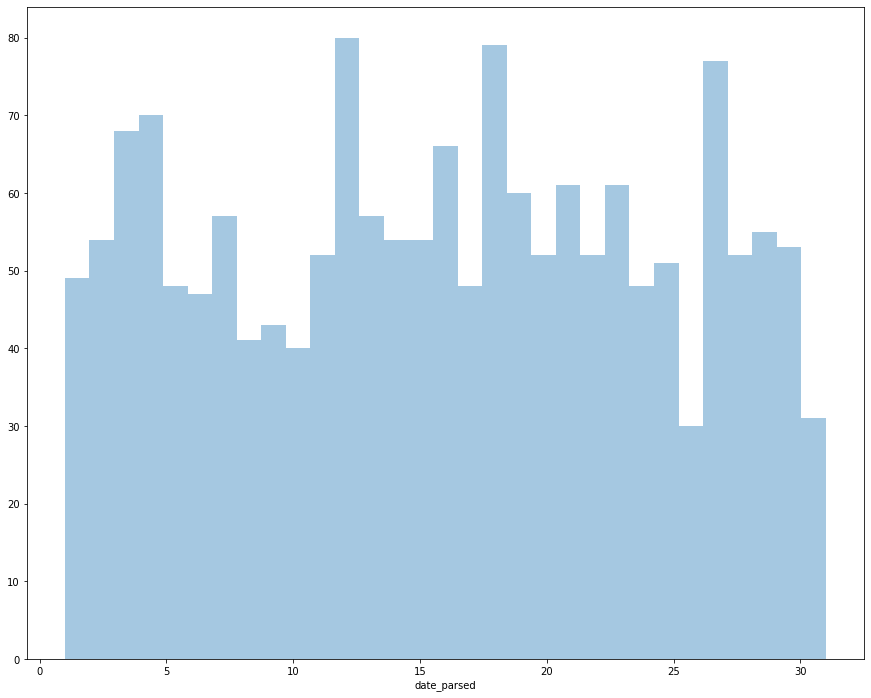

In [16]:
#get day of month from landslised
day_of_month_landslides = landslides['date_parsed'].dt.day
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
plt.figure(figsize=(15,12))
sns.distplot(day_of_month_landslides, kde=False, bins=31);

Make sense

<pre style='font-size : 20px'><b>PART 3</b></pre>
<pre style='font-size : 18px'><b>Try it yourself</b></pre>

# **Now is your turn with earthquakes dataset.**

*Hints:*
**What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, use pandas to try to infer what the right date format should be. You can do it this way:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

**Why don't you always use infer_datetime_format = True?** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

**Task with a star**

*   How human can be correct in detecting date format?
*   Can we make correct dates from string without specifying format?

Come back here after a while and try to solve this task without build in packages and function but with building your own AI for detecting date format from strings based on NN and Deep Learning.

In [0]:
earthquakes = load_data('earthquakes.csv')